In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import pickle
input = open('data_class.pkl', 'rb')
obj = pickle.load(input)
input.close()
X_train = obj["X_train"]
X_test = obj["X_test"]
y_train = obj["y_train"]
y_test = obj["y_test"]

In [3]:
def max_leaf_nodes(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        rf = DecisionTreeClassifier(max_leaf_nodes = i, random_state=10).fit(X_train, y_train)
        mse_train.append(mean_squared_error(y_train, rf.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, rf.predict(X_test)))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("max_leaf_nodes")

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method

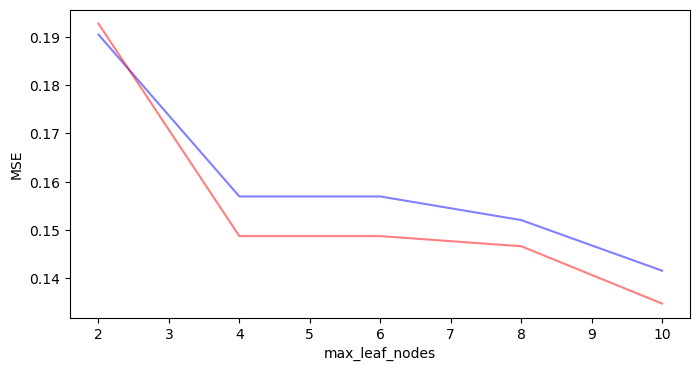

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
max_leaf_nodes(X_train, X_test, y_train, y_test, [2, 4, 6, 8, 10])
plt.show()

Итак, видим, что средний квадрат ошибки тестовой выборки меньше, нежели обучающей, это хороший результат. Для определения количества ветвей нужно провести эксперименты и посмотреть на результаты моделей.

In [5]:
ct = DecisionTreeClassifier(max_leaf_nodes = 4, criterion = 'entropy', random_state = 10).fit(X_train, y_train)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


In [6]:
y_pred = ct.predict(X_test)
ct.score(X_test,y_test)

0.8470670391061452

In [7]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[760 106]
 [113 453]]


In [8]:
ct = DecisionTreeClassifier(max_leaf_nodes = 3, criterion = 'entropy', random_state = 10).fit(X_train, y_train)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


In [9]:
y_pred = ct.predict(X_test)
ct.score(X_test,y_test)

0.8072625698324022

In [10]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[866   0]
 [276 290]]


In [11]:
ct = DecisionTreeClassifier(max_leaf_nodes = 9, criterion = 'entropy', random_state = 10).fit(X_train, y_train)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


In [12]:
y_pred = ct.predict(X_test)
ct.score(X_test,y_test)

0.8589385474860335

In [13]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[813  53]
 [149 417]]


Самых лучших результатов удалось достичь при количестве ветвей 9. Сравнивая с результатами логистической регрессии, качество этой модели хуже.

RandomForestClassifier

In [14]:
def rf_best_n_estimator(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        rf = RandomForestClassifier(n_estimators=i, random_state=10).fit(X_train, y_train)
        mse_train.append(mean_squared_error(y_train, rf.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, rf.predict(X_test)))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("N_estimators")

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:32: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ._gradient_boosting import predict_stages
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:32: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ._gradient_boost

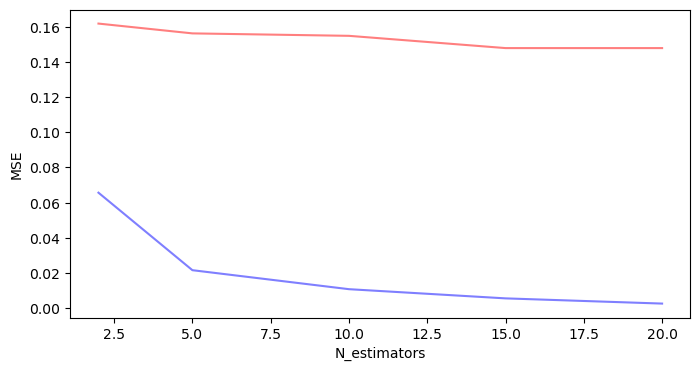

In [15]:
from sklearn.ensemble import RandomForestClassifier    
rf_best_n_estimator(X_train, X_test, y_train, y_test, [2, 5, 10, 15, 20])
plt.show()

Предположительно, оптимальное количество деревьев может составлять 5. Будем дальше изучать этот вопрос.

In [16]:
def rf_max_leaf_nodes(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        rf = RandomForestClassifier(n_estimators=5, max_leaf_nodes =i, random_state=10).fit(X_train, y_train)
        mse_train.append(mean_squared_error(y_train, rf.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, rf.predict(X_test)))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("max_leaf_nodes")

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/ensemble/forest.py:489: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_store_unique_indices = np.zeros(y.shape, dtype=np.int)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish

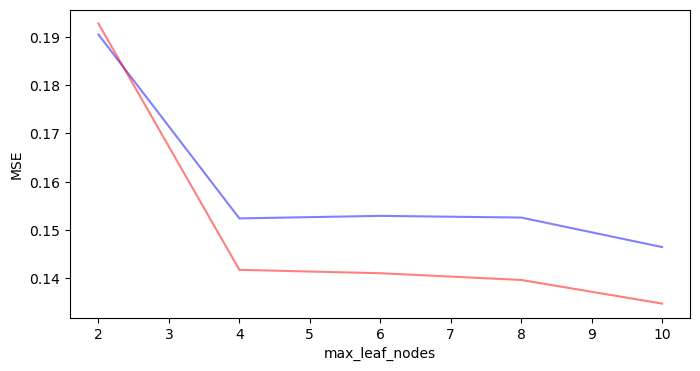

In [17]:
rf_max_leaf_nodes(X_train, X_test, y_train, y_test, [2, 4, 6, 8, 10])
plt.show()

Количество ветвей можно взять равным 4, так как дальше явных изменений с уменьшением ошибки не наблюдается. Поэтому не считаю нужным усложнять модель. 

In [18]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 5, max_leaf_nodes = 4, random_state = 10).fit(X_train, y_train)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/ensemble/forest.py:489: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_store_unique_indices = np.zeros(y.shape, dtype=np.int)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish

In [19]:
y_pred = rf.predict(X_test)
y_pred = (y_pred > 0.5)
rf.score(X_test,y_test)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/ensemble/base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/ensemble/base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the re

0.8582402234636871

Уровень объясненности модели достаточно хороший. Посмотрим результати сопряженной матрицы.

In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[798  68]
 [135 431]]


По результатам матрицы можно сказать о том, что в сравнении с предыдущими классификаторами распознание объектов в целом хорошее.

In [21]:
#pip install catboost

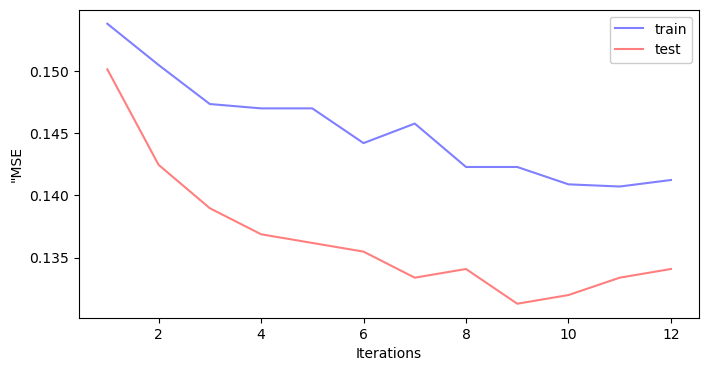

In [22]:
def catboost_best_n_estimator(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        catboost = CatBoostClassifier(iterations=i,random_state=10).fit(X_train, y_train,eval_set=(X_test, y_test),logging_level='Silent')
        mse_train.append(mean_squared_error(y_train, catboost.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, catboost.predict(X_test)))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel('"MSE')
    ax.set_xlabel('Iterations')
    ax.legend(framealpha=1, frameon=True);
from catboost import CatBoostClassifier
catboost_best_n_estimator(X_train, X_test, y_train, y_test, list(range(1,13)))
plt.show()

Наилучшее количество оценщиков равно 9, так как на этом уровне итераций наименьший результат ошибок на тестовой выборке. 

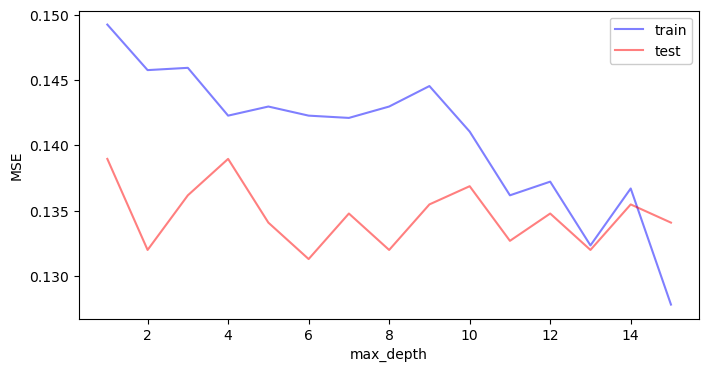

In [24]:
def catboost_max_depth(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        catboost = CatBoostClassifier(iterations=9,max_depth=i,random_state=10).fit(X_train,y_train,eval_set=(X_test, y_test),logging_level='Silent')
        mse_train.append(mean_squared_error(y_train, catboost.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, catboost.predict(X_test)))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("max_depth")
    ax.legend(framealpha=1, frameon=True);

catboost_max_depth(X_train, X_test, y_train, y_test, list(range(1,16)))
plt.show()

In [25]:
cb = CatBoostClassifier(iterations=9,max_depth=6,random_state=10).fit(X_train, y_train,eval_set=(X_test, y_test),logging_level='Silent')
cb_y_pred = cb.predict(X_test)
cb.score(X_test,y_test)

0.8687150837988827

In [26]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[798  68]
 [135 431]]


Итак, по коэффициенту детерминации данная модель показала наилучшие результаты, но количество неверно распознанных объектов не наилучшее.

Таким образом, среди всех рассмотренных методов классификации, лучше всего с поставленной задачей справилась модель К-ближайшик соседей. Модель объяснена на 86,6%, а её точность классификации составляет 0,87. Для сравнения, у логистической регрессии эта точность была такой же. Модели лучше расспознают тех клиентов, которые не имеют привязаности к сайту. 